In [9]:
import numpy as np
import pylab as plt
import seaborn as sns
sns.set_style('ticks')

from tsnecuda import TSNE as fTSNE
from sklearn.manifold import TSNE

import sys; sys.path.append('../../../OfficialCodes/FIt-SNE/')
from fast_tsne import fast_tsne

In [29]:
# Load MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype('int')
print(X.shape)
print(y.unique())

label = y.to_numpy()
label.shape

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [5]:
# Do PCA and keep 50 dimensions
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]

X50.shape, X50.dtype

((70000, 50), dtype('float64'))

In [7]:
# 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

In [6]:
%time 
Z = fast_tsne(X50)

=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data_2022-11-21 13:31:30.744157-883137727.dat
fast_tsne result_path: result_2022-11-21 13:31:30.744157-883137727.dat
fast_tsne nthreads: 18
Read the following parameters:
	 n 70000 by d 50 dataset, theta 0.500000,
	 perplexity 30.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 5833.333333, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 70000 x 50 data matrix successfully. X[0,0] = 122.255255
Read the initialization successfully.
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems

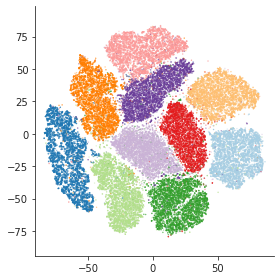

In [33]:
plt.figure(figsize=(4,4))
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=2, 
    edgecolors='none',cmap=plt.cm.get_cmap('Paired'), alpha=0.4)
sns.despine()
plt.tight_layout()

In [15]:
%time

Z2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X50)

Z2.shape

(70000, 2)

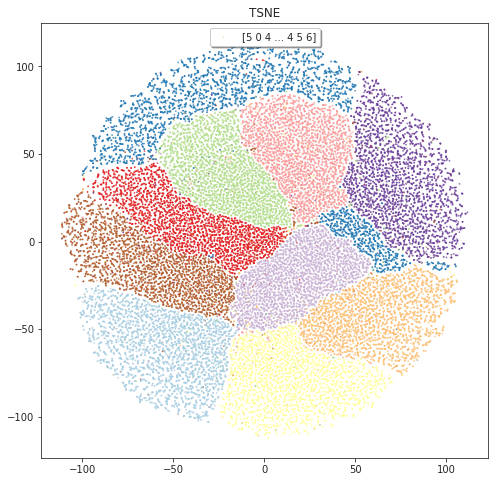

In [30]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )

# Create the scatter
ax.scatter(
    x=Z2[:,0],
    y=Z2[:,1],
    c=y,
    label=label,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4,
    s=0.5)
ax.legend(loc='upper center', shadow=True)

plt.show()

In [27]:
Z2 = fTSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(X50)
Z2.shape

In [28]:
X_embedded.shape

(70000, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


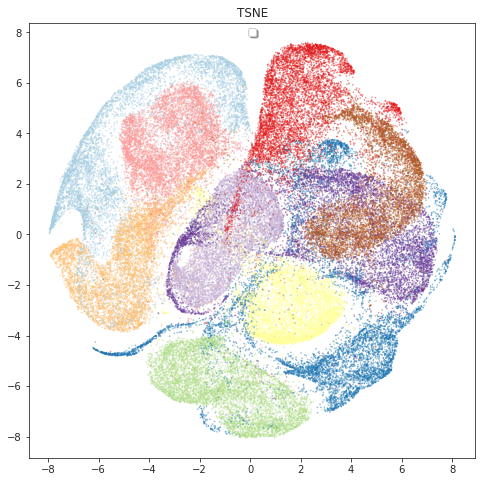

In [31]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )

# Create the scatter
ax.scatter(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    c=y,
    # label=label,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4,
    s=0.5)
ax.legend(loc='upper center', shadow=True)

plt.show()